In [1]:
%alias package #{__import__('sys').executable} -m pip install --quiet --upgrade %l

In [2]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [3]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [4]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
%package tensorflow

import tensorflow as tf
from tensorflow import keras as keras

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


2022-12-02 02:04:27.172134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 02:04:28.556517: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib/:/opt/conda/lib/
2022-12-02 02:04:28.556791: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib6

In [ ]:
%package tensorflow-addons
import tensorflow_addons as tfa

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [6]:
%package spacy spacy-transformers

import spacy
#import spacy_transformers
spacy.prefer_gpu()

#spacy.cli.download('en_core_web_lg', False, False, '--quiet')

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


False

In [7]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [8]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [10]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [11]:
df_scripts

,script_name,script_text
0,No Country for Old Men Script,[\r\n\r\n\r\n \r\n NO...
1,Strangers on a Train Script,[ STRANGERS ON A TRAIN\r\n\r...
2,"Sex, Lies and Videotape Script",[\r\n\r\n<b><!--\r\n</b>if (window!= top)\r\nt...
3,Absolute Power Script,[ABSOLUTE POWER\r\n\r\n Written by\r\n ...
4,"World is not Enough, The Script",[\t\t\r\n\r\n T H E W O R L D I S ...
...,...,...
1204,Shivers Script,[\r\n\r\n\r\n ...
1205,American Psycho Script,[\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\...
1206,Five Easy Pieces Script,[\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\...
1207,Saving Mr. Banks Script,[\r\n\r\n\r\n ...


In [12]:
df_scripts = df_scripts.astype({
    'script_name': 'category'
})

In [13]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [14]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [15]:
df_scripts

,script_name,script_text
0,No Country for Old Men Script,\r\n\r\n\r\n \r\n NO ...
1,Strangers on a Train Script,STRANGERS ON A TRAIN\r\n\r\...
2,"Sex, Lies and Videotape Script",\r\n\r\n<b><!--\r\n</b>if (window!= top)\r\nto...
3,Absolute Power Script,ABSOLUTE POWER\r\n\r\n Written by\r\n ...
4,"World is not Enough, The Script",\t\t\r\n\r\n T H E W O R L D I S N...
...,...,...
1172,Shivers Script,\r\n\r\n\r\n ...
1173,American Psycho Script,\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\r...
1174,Five Easy Pieces Script,\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\r...
1175,Saving Mr. Banks Script,\r\n\r\n\r\n ...


In [16]:
#print(dataset_scripts.iloc[0]['script_text'][-1])

TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [17]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [18]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep, #'\r\n' #os.linesep
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt

In [19]:
df_scripts_para = (
    df_scripts[['script_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [20]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [21]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [22]:
df_scripts_para['script_name'] = (
    df_scripts_para['script_name']
        .cat.remove_unused_categories()
)

In [23]:
df_scripts_para

,script_name,script_paragraphs
1,No Country for Old Men Script,NO COUNTRY FOR OLD MEN
2,No Country for Old Men Script,Written by
3,No Country for Old Men Script,Joel Coen & Ethan Coen
4,No Country for Old Men Script,Based on the Novel by
5,No Country for Old Men Script,Cormac McCarthy
...,...,...
1999877,Get Carter Script,Carter lies on the beach. The waves lap around...
1999878,Get Carter Script,EXT. CLIFF TOP - EARLY MORNING
1999879,Get Carter Script,Kinnear's hit man coolly dismantles his rifle....
1999880,Get Carter Script,FADE OUT:


In [24]:
# TODO rm
#df_scripts['script_paragraphs'].iloc[0][:20]

In [25]:
df_n_paras = df_scripts_para.groupby('script_name').count()

In [26]:
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
script_name,
Ace Ventura: Pet Detective Script,3
American Outlaws Script,1
Days of Heaven Script,2
Erik the Viking Script,3
Fletch Script,2
Four Feathers Script,8
Highlander: Endgame Script,4
Made Script,1
Never Been Kissed Script,6


In [27]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['script_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
df_scripts_outliers

,script_name,script_paragraphs
370547,Four Feathers Script,"""Four Feathers"" -- by Michael Schiffer, revise..."
370548,Four Feathers Script,<b><!--\n</b>if (window!= top)\ntop.location.h...
370549,Four Feathers Script,Four Feathers\nScreenplay by Michael Schiffer\...
370550,Four Feathers Script,EXT. TRAINING GROUND/ WESTMINSTER barracks/ LO...
370551,Four Feathers Script,COLONEL SUTCH\nThrow them away. They don't mea...
370552,Four Feathers Script,- THE CHAPEL: is filled with MILITARY MEN; Fev...
370553,Four Feathers Script,CUT TO:\nEXT. CHURCH - AFTER CEREMONY ...
370554,Four Feathers Script,THE END.
407261,Training Day Script,"""Training Day"" -- by David Ayer ..."
540920,Never Been Kissed Script,"""Never Been Kissed"""


In [28]:
df_scripts_outliers.loc[370549]['script_paragraphs']

'Four Feathers\nScreenplay by Michael Schiffer\nrevised by Hossein Amini\nbased on the book by A.E. Mason'

In [65]:
# TODO lxml to parse html
#print(df_scripts[df_scripts['script_name'] == 'They Script'].iloc[0]['script_text'][:10000])

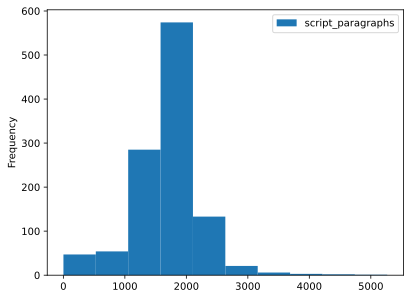

In [30]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

In [31]:
class KerasTextVectorizer(skl.base.TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.base = keras.layers.TextVectorization(
            *args, **kwargs
        )
        self.base.compile()

    def fit(self, X, _y=None):
        self.base.adapt(X)
        return self

    def transform(self, X, _y=None):
        return self.base(X)

In [32]:
class SpacyTextVectorizer(KerasTextVectorizer):
    def __init__(self, *args, **kwargs):
        nlp = spacy.load('en_core_web_lg')
        super().__init__(
            *args, 
            vocabulary=list(nlp.vocab.strings),
            **kwargs
        )

    def fit(self, _X, _y=None):
        return self

#### Classifier

In [62]:
def KerasTextClassifier(*args, **kwargs):
    class _class(skeras.wrappers.KerasClassifier):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)

            self.n_features_in_ = None

            self._user_feature_max_idx = None
            self._user_target_encoder = (
                skl.preprocessing.OneHotEncoder(
                    sparse=False
                )
            )

        def initialize(self, X, y):
            # TODO
            self._user_feature_max_idx = np.max(X) + 1
            return super().initialize(X, y)
        
        #@property
        #def feature_encoder(self):
        #    pass

        @property
        def target_encoder(self):
            return self._user_target_encoder

    _inst = None

    def _build_model():
        nonlocal _inst

        n_features = _inst._user_feature_max_idx #_inst.n_features_in_
        n_classes = np.size(_inst._user_target_encoder.categories_)

        input_dim = n_features
        output_dim = n_classes

        # see https://www.tensorflow.org/tutorials/keras/text_classification
        model = keras.Sequential([
            keras.layers.Embedding(
                input_dim=input_dim,
                output_dim=128,
                mask_zero=True
            ),

            keras.layers.Conv1D(
                filters=32, kernel_size=3, 
                padding='same', 
                activation='relu'
            ),
            keras.layers.MaxPooling1D(pool_size=10),
            keras.layers.Dropout(.1),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu'),

            keras.layers.Dense(
                output_dim,
                activation='softmax'
            )
        ])

        model.compile(
            loss='categorical_crossentropy', 
            optimizer='adam', # TODO  
            metrics=['accuracy']
        )

        return model

    _inst = _class(
        _build_model, 
        *args, **kwargs
    )
    return _inst

#### Predictor (Vocab From Spacy)

In [68]:
def _model_nn_spacy(X, y):
    #encoder = SpacyTextVectorizer(
    encoder = KerasTextVectorizer(
        max_tokens=None,
        standardize='lower_and_strip_punctuation',
        split='whitespace',
        #ngrams=(1, 2),
        output_mode='int', # TODO tf_idf
        #sparse=True,
    )

    X = encoder.fit_transform(X)

    clf = KerasTextClassifier(
        verbose=0,
        callbacks=[
            tfa.callbacks.TQDMProgressBar(
                show_epoch_progress=False
            )
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #),
            #keras.callbacks.LambdaCallback(
            #    on_train_end=lambda logs: print(logs)
            #)
        ]
    )
    clf.initialize(X, y)

    # TODO rm
    #print(
    #    clf.n_features_in_,
    #    X.shape,
    #    encoder.base.vocabulary_size()
    #)
#
    #print(np.max(X) + 1)
    
    model = skl.model_selection.GridSearchCV(
        clf,
        param_grid={
            'epochs': [100],
            'batch_size': [1024],
            'optimizer__learning_rate': [.01]
        },
        cv=skl.model_selection.RepeatedStratifiedKFold(
            n_splits=3, n_repeats=1
        ),
        #cv=skl.model_selection.KFold(
        #    n_splits=5, shuffle=True
        #),
        #n_jobs=-1,
        verbose=3
    )

    # TODO
    #model = clf

    model.fit(X, y)

    return model

In [71]:
# TODO
df_scripts_para_ = df_scripts_para.drop(df_scripts_outliers.index)
df_scripts_para_ = df_scripts_para_[
    df_scripts_para_['script_name'].isin(
        pd.Series(df_scripts_para_['script_name'].unique()).sample(10)
    )
]
df_scripts_para_['script_name'] = (
    df_scripts_para_['script_name']
        .cat.remove_unused_categories()
)
df_scripts_para_ = df_scripts_para_.groupby('script_name').sample(1000, replace=True)

model_nn_spacy = _model_nn_spacy(
    X=df_scripts_para_['script_paragraphs'],
    y=df_scripts_para_[['script_name']]
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

[CV 1/3] END batch_size=1024, epochs=100, optimizer__learning_rate=0.01;, score=0.820 total time= 1.6min


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

[CV 2/3] END batch_size=1024, epochs=100, optimizer__learning_rate=0.01;, score=0.818 total time= 1.3min


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

[CV 3/3] END batch_size=1024, epochs=100, optimizer__learning_rate=0.01;, score=0.799 total time= 1.2min


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

In [73]:
model_nn_spacy.best_score_

0.8123992063273514

In [ ]:
model_nn_spacy.predict()

In [ ]:
# TODO histogram
df_scripts['script_paragraphs'].apply(len) < 10

0       False
1       False
2       False
3       False
4       False
        ...  
1172    False
1173    False
1174    False
1175    False
1176    False
Name: script_paragraphs, Length: 1177, dtype: bool

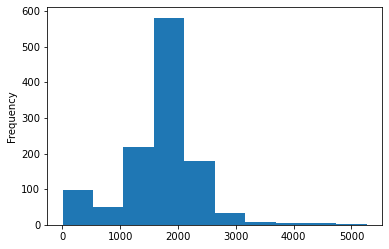

In [ ]:
_ = df_scripts['script_paragraphs'].apply(len).plot.hist()

In [ ]:
df_scripts[df_scripts['script_paragraphs'].apply(len) < 2]

,script_name,script_text,script_paragraphs
25,"Officer and a Gentleman, An Script",,[]
92,Commando Script,,[]
101,Speed Script,,[]
111,Frankenstein Script,,[]
125,Equilibrium Script,,[]
140,Conan the Barbarian Script,,[]
227,Training Day Script,"""Training Day"" -- by David Ayer ...","[ ""Training Day"" -- by David Ayer ..."
238,Superfights Script,,[]
245,25th Hour Script,,[]
252,Jade Script,,[]


In [ ]:
#df_scripts.iloc[558]['script_paragraphs']

In [ ]:
df_scripts['script_paragraphs'].apply(len).iloc[1175]

1759

In [ ]:
len(df_scripts['script_paragraphs'].iloc[1175])

1759